<a href="https://colab.research.google.com/github/Phassakorn512/CS240-termproject/blob/main/termproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Member**
นายพัศกร สงวนเชื้อ 6709616723
* มีหน้าที่ วางแผน Timeline ประสานงาน ตรวจ notebook รวมไฟล์ และตรวจความพร้อมก่อนส่ง

นางสาวณัฐณิชา จุลโพธิ์ 6709540063
* มีหน้าที่กำหนด Problem framing และบอกจุดประสงค์ของหัวข้อที่ต้องการจะค้นคว้า

นายกฤษณะพล บุญเรือง 6709681057
* มีหน้าที่บอกรายละเอียด Data Acquisition

นายภูจิร ยังเหลือ 6709616806
* มีหน้าที่วิเคราะห์ข้อมูลเชิงสํารวจ (EDA) เพื่อค้นหา insights เเละ สร้างกราฟ

การิน สุภาเรือง 6709520065
* มีหน้าที่สร้างและ Train โมเดล

พัชรพล ศรีประเสริฐ 6709616707
* มีหน้าที่ Evaluate model และสรุป model ที่ดีสุด




# **Problem Framing**

**คุณภาพการนอน (sleep quality) มีความสัมพันธ์ต่ออัตราความเครียดอย่างไร?**

หัวข้อนี้มุ่งศึกษาและทำความเข้าใจว่า การนอนหลับที่ดีหรือไม่ดี มีผลต่อ ระดับความเครียดของเราอย่างไร?

---

สมมติฐาน:
*   นอนหลับดี (คุณภาพการนอนสูง) → ความเครียดลดลงเป็นส่วนใหญ่
*   นอนหลับไม่ดี (คุณภาพการนอนต่ำ) → ความเครียดเพิ่มขึ้นเป็นส่วนใหญ่

* หมายเหตุ: ปัจจัยอื่น ๆ เช่น ชั่วโมงการนอน, ภาระการเรียน, กิจกรรมนอกหลักสูตร, ผลการเรียน จะใช้ ช่วยในโมเดลทำนาย เพื่อเพิ่มความแม่นยำ แต่ไม่ใช่ตัวแปรที่เราจะ focus วิเคราะห์โดยตรง

---

**สิ่งที่เราจะหา / วิเคราะห์**

* วิเคราะห์ความสัมพันธ์ระหว่างคุณภาพการนอนกับความเครียด

* สร้างโมเดลทำนายคุณภาพการนอนจากความเครียด

---


**สิ่งที่จะได้จากงานนี้**

Insight / Data Interpretation: เข้าใจว่าระดับความเครียดส่งผลต่อคุณภาพการนอนอย่างไร

โมเดลทำนายคุณภาพการนอน: ใช้ความเครียดและปัจจัยอื่น ๆ เป็นตัวแปร

แนวทางปรับพฤติกรรม: ข้อเสนอเพื่อปรับพฤติกรรมลดความเครียดและเพิ่มคุณภาพการนอน

---

**ความสำคัญของปัญหา:**
* การนอนหลับเป็นกิจกรรมพื้นฐานที่มนุษย์ทำทุกวัน
* คุณภาพการนอนที่ดีมีผลต่อ ร่างกาย (ฟื้นฟูกล้ามเนื้อ ระบบภูมิคุ้มกัน) และ จิตใจ (ลดความเครียด เพิ่มสมาธิ)
* การนอนไม่เพียงพอหรือคุณภาพไม่ดีส่งผลเสียต่อชีวิตประจำวัน เช่น การเรียน การทำงาน และสุขภาพจิต
* การทำความเข้าใจความสัมพันธ์นี้ช่วยให้คนทั่วไปปรับปรุงการนอน เพื่อชีวิตที่มีคุณภาพและลดความเครียด

---

**แหล่งอ้างอิง:**
https://www.kaggle.com/datasets/sidraaazam/analyzing-student-stress-factors



In [1]:
#นำเข้า kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sidraaazam/analyzing-student-stress-factors")

print("Path to dataset files:", path)

100%|██████████| 864/864 [00:00<00:00, 1.70MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sidraaazam/analyzing-student-stress-factors/versions/1


In [2]:
# Load module
import pandas as pd # DataFrame
import seaborn as sb # graph
import matplotlib.pyplot as plt # Plot
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.preprocessing import StandardScaler # standardize features
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.metrics import accuracy_score, classification_report # model evaluation metrics

In [3]:
import os

os.listdir(path)

['Student Stress Factors (2).csv']

# Data Acquisition

In [4]:

df = pd.read_csv(path + "/Student Stress Factors (2).csv")

df.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


**ข้อมูลคุณลักษณะ**

* Kindly Rate your Sleep Quality 😴(Sleep_Quality): คุณภาพการนอน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* How many times a week do you suffer headaches 🤕(Headaches): ความถี่ของการปวดศีรษะ ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate you academic performance 👩‍🎓(Academic_Performance): ระดับผลการเรียน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* how would you rate your study load?(Sutdy_Load): ระดับภาระการเรียน ของนักเรียน [ระดับคะแนน: 1 (เบาที่สุด) ถึง 5 (หนักที่สุด)]

* How many times a week you practice extracurricular activities 🎾(Extracurricular): ความถี่ของการทำกิจกรรมนอกหลักสูตร ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate your stress levels?(Stress_Levels): ระดับความเครียด ของนักเรียน [ระดับคะแนน: 1 (น้อยที่สุด) ถึง 5 (มากที่สุด)]

#Data Preparation

Data Cleaning



In [6]:
#Rename Column
column_map = {
    'Kindly Rate your Sleep Quality 😴': 'Sleep_Quality',
    'How many times a week do you suffer headaches 🤕?': 'Headaches',
    'How would you rate you academic performance 👩‍🎓?': 'Academic_Performance',
    'how would you rate your study load?': 'Study_Load',
    'How many times a week you practice extracurricular activities 🎾?': 'Extracurricular',
    'How would you rate your stress levels?': 'Stress_Levels'
}

df = df.rename(columns=column_map)

หาค่าตัวที่ซ้ำกัน (Duplicate)

In [7]:
print(f"จำนวนแถว: {len(df)}")

จำนวนแถว: 520


In [8]:
duplicate_rows = df.duplicated().sum()
print(f"จำนวนแถวที่ซ้ำซ้อน: {duplicate_rows}")

จำนวนแถวที่ซ้ำซ้อน: 416


ข้อมูลซ้ำกันเป็นเพราะ ข้อมูลชุดนี้แสดงผลเป็นตัวเลข

In [9]:
#หาจำนวน ตัวซ้ำ duplicate ถ้าซ้ำจะแสดงเป็น true
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
515,True
516,True
517,True
518,True


หา Missing Data

In [10]:
#หาmissingdata
print(df.isnull().sum())

Sleep_Quality           0
Headaches               0
Academic_Performance    0
Study_Load              0
Extracurricular         0
Stress_Levels           0
dtype: int64


Handling Outliers

In [11]:
#หา outlier
Q1 = df.quantile(0.25)#หาq1
Q3 = df.quantile(0.75)#หาq1

IQR = Q3-Q1 #หาพิสัยระหว่างquantile
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
#หาค่านอกเกณฑ์ทางลบ
print(lower_bound)

Sleep_Quality          -1.0
Headaches              -2.0
Academic_Performance    1.5
Study_Load             -1.0
Extracurricular        -3.5
Stress_Levels          -1.0
dtype: float64


In [13]:
print("Sleep_Quality",(df["Sleep_Quality"]<-1.0).sum()) #
print("Headaches",(df["Headaches"]<-2.0).sum())
print("Academic_Performance",(df["Academic_Performance"]<1.5).sum())
print("Study_Load",(df["Study_Load"]<1.0).sum())
print("Extracurricular",(df["Extracurricular"]<-3.5).sum())
print("Stress_Levels",(df["Stress_Levels"]<-1.0).sum())

Sleep_Quality 0
Headaches 0
Academic_Performance 35
Study_Load 0
Extracurricular 0
Stress_Levels 0


In [14]:
#หาค่านอกเกณฑ์ทางบวก
print(upper_bound)

Sleep_Quality           7.0
Headaches               6.0
Academic_Performance    5.5
Study_Load              7.0
Extracurricular         8.5
Stress_Levels           7.0
dtype: float64


In [15]:
print("Sleep_Quality",(df["Sleep_Quality"]>7.0).sum()) #
print("Headaches",(df["Headaches"]>6.0).sum())
print("Academic_Performance",(df["Academic_Performance"]>5.5).sum())
print("Study_Load",(df["Study_Load"]>7.0).sum())
print("Extracurricular",(df["Extracurricular"]>8.5).sum())
print("Stress_Levels",(df["Stress_Levels"]>7.0).sum())

Sleep_Quality 0
Headaches 0
Academic_Performance 0
Study_Load 0
Extracurricular 0
Stress_Levels 0


In [16]:
#รวมค่านอกเกณฑ์ทั้งหมด
outliers = ((df < lower_bound) | (df > upper_bound))
print(outliers.sum())

Sleep_Quality            0
Headaches                0
Academic_Performance    35
Study_Load               0
Extracurricular          0
Stress_Levels            0
dtype: int64


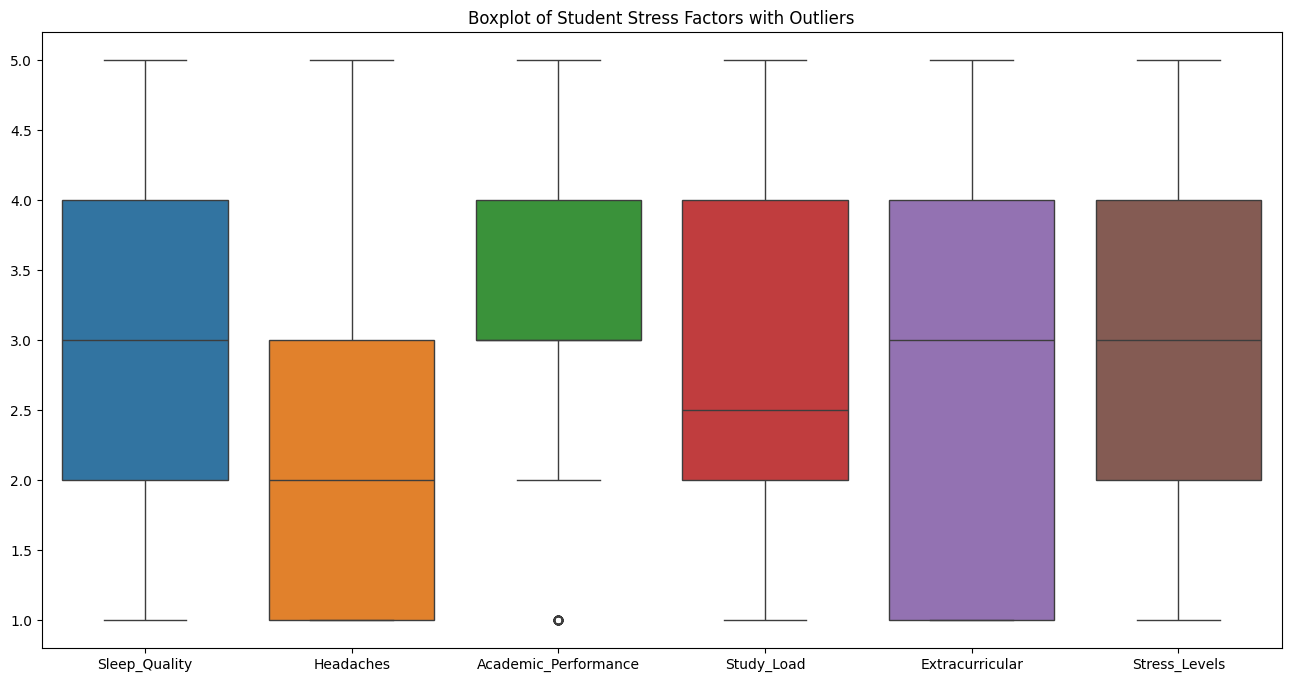

In [17]:
# ทำแผนภาพกล่อง Boxplot

plt.figure(figsize=(16, 8))
sb.boxplot(data=df)
plt.xticks(rotation=0)
plt.title('Boxplot of Student Stress Factors with Outliers')
plt.show()

#EDA

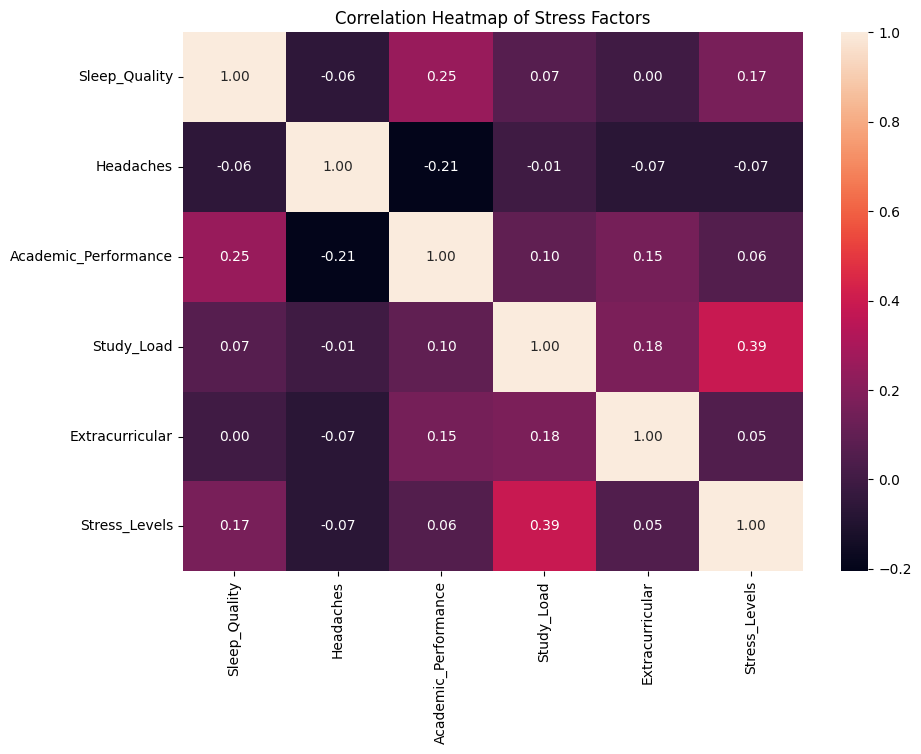

In [18]:
# สร้างกราฟ Heatmap แสดงค่า Correlation ของ Stress Factors
corr = df.corr()
plt.figure(figsize=(10, 7))
sb.heatmap(corr, annot=True , fmt='.2f')
plt.title('Correlation Heatmap of Stress Factors')
plt.show()

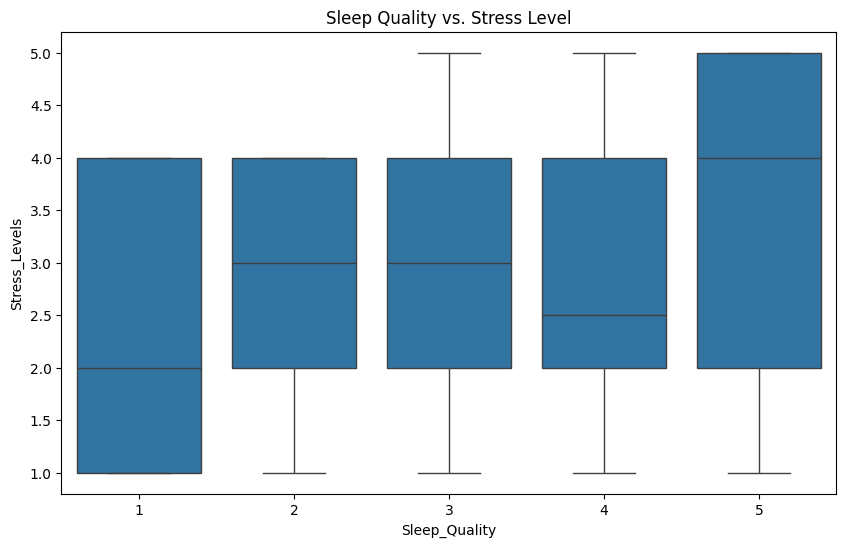

In [19]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Stress Level (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Stress_Levels', data=df)
plt.title('Sleep Quality vs. Stress Level')
plt.show()

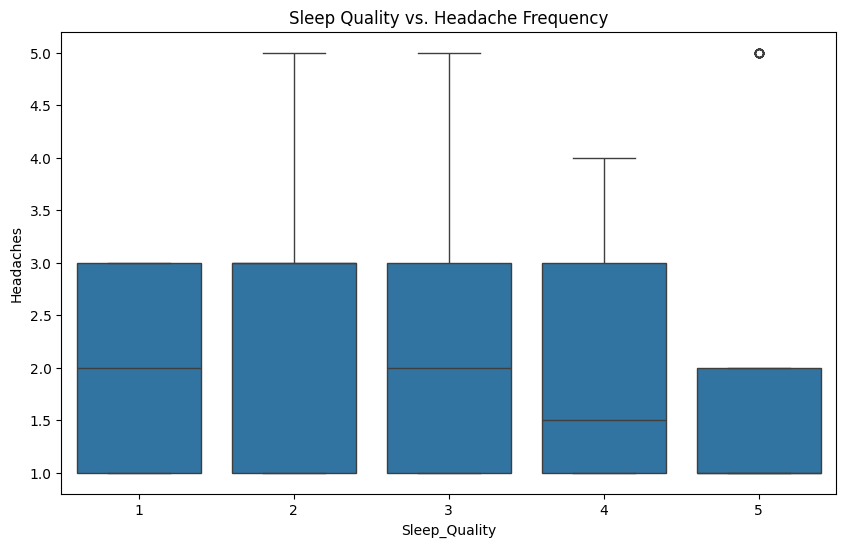

In [20]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Headache Frequency (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y="Headaches", data=df)
plt.title('Sleep Quality vs. Headache Frequency')
plt.show()

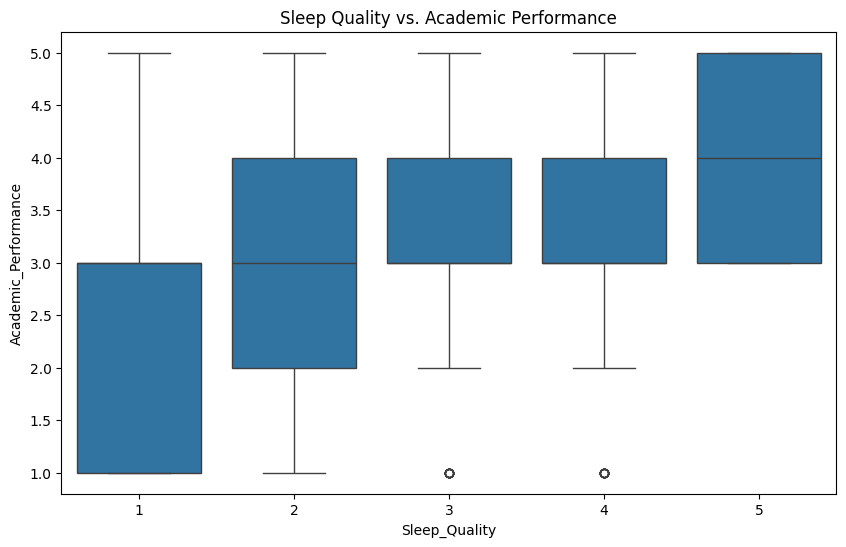

In [21]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Academic Perfomance (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Academic_Performance', data=df)
plt.title('Sleep Quality vs. Academic Performance')
plt.show()

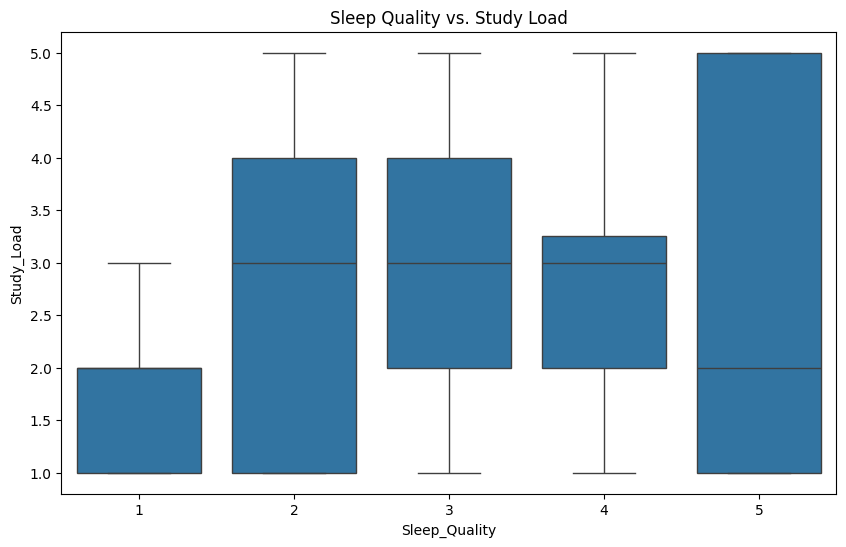

In [22]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Study Load (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Study_Load', data=df)
plt.title('Sleep Quality vs. Study Load')
plt.show()

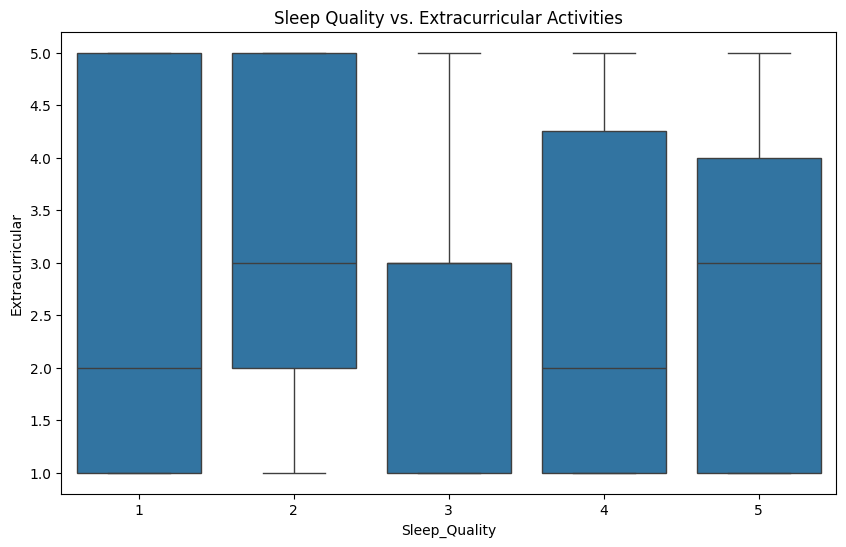

In [23]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Extracurricular', data=df)
plt.title('Sleep Quality vs. Extracurricular Activities')
plt.show()
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Extracurricular Activities (แกน Y)

#Model Planning

# Model Planning

ในส่วนนี้ เราจะวางแผนการสร้างแบบจำลอง Machine Learning เพื่อตอบปัญหาที่ตั้งไว้ใน Problem Framing

เป้าหมายหลักของเราคือการสร้างแบบจำลองที่สามารถทำนาย **"คุณภาพการนอน (Sleep Quality)"** ของนักเรียน โดยใช้ความเครียดและปัจจัยอื่นๆ เป็นตัวแปรในการทำนาย

---

**1. ประเภทของปัญหา (Problem Type)**

* นี่คือปัญหาประเภท **Classification** (การจำแนกประเภท) เนื่องจากตัวแปรเป้าหมาย (Sleep Quality) เป็นข้อมูลแบบกลุ่ม (Categorical) ที่มีระดับคะแนน 1, 2, 3, 4, หรือ 5

**2. การกำหนดตัวแปร (Variable Definition)**

* **ตัวแปรเป้าหมาย (Target Variable - y):**
    * `Sleep_Quality` (Kindly Rate your Sleep Quality 😴)
* **ตัวแปรอิสระ (Features - X):**
    * `Stress_Levels` (How would you rate your stress levels?)
    * `Headaches` (How many times a week do you suffer headaches 🤕?)
    * `Academic_Performance` (How would you rate you academic performance 👩‍🎓?)
    * `Study_Load` (how would you rate your study load?)
    * `Extracurricular` (How many times a week you practice extracurricular activities 🎾?)
    

**3. การเลือกแบบจำลอง (Model Selection)**

เราจะทำการทดสอบและเปรียบเทียบแบบจำลอง Classification 3 รูปแบบ เพื่อหารูปแบบที่แม่นยำที่สุด:

1.  **Logistic Regression**: แบบจำลองเชิงเส้น (Linear Model) ที่ดีสำหรับการเป็นแบบจำลองพื้นฐาน (Baseline)
2.  **Decision Tree**: แบบจำลองแบบต้นไม้ (Non-linear) ที่เข้าใจง่ายและสามารถตีความได้
3.  **Random Forest**: แบบจำลองแบบกลุ่ม (Ensemble Model) ที่ใช้หลักการของ Decision Trees หลายๆ ต้น เพื่อเพิ่มความแม่นยำและลด Overfitting

**4. การประเมินแบบจำลอง (Model Evaluation)**

* **Train-Test Split**: เราจะแบ่งข้อมูลทั้งหมดออกเป็น 2 ส่วน:
    * **Training Set (80%)**: ใช้สำหรับสอน (Train) แบบจำลอง
    * **Testing Set (20%)**: ใช้สำหรับทดสอบประสิทธิภาพของแบบจำลองกับข้อมูลที่ไม่เคยเห็นมาก่อน
* **ตัวชี้วัด (Metrics)**: เราจะใช้ **Accuracy** (ความแม่นยำโดยรวม) และ **Classification Report** (ซึ่งประกอบด้วย Precision, Recall, F1-score) เพื่อประเมินว่าแบบจำลองทำนายแต่ละคลาส (1-5) ได้ดีเพียงใด

#Model Building

In [24]:
def train_student_models(df):
    """
    Trains 3 different models to predict sleep quality from survey answers.
    """
    # 1. Grab the features we want and what we're predicting
    try:
        target_column = 'Sleep_Quality'
        feature_columns = [
            'Headaches',
            'Academic_Performance',
            'Study_Load',
            'Extracurricular',
            'Stress_Levels'
        ]
        X = df[feature_columns]
        y = df[target_column]

    except KeyError as e:
        print(f"Oops! Can't find column {e} in the data.")
        print(f"Double-check the column_map to make sure everything's mapped right.")
        return None

    # 2. Split into training and testing sets (80/20 split)
    # random_state=42 keeps results consistent between runs
    # stratify=y makes sure each sleep rating (1-5) is evenly distributed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # 3. Scale the features (logistic regression works better with scaled data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Set up our three models
    models = {
        'Logistic_Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision_Tree': DecisionTreeClassifier(random_state=42),
        'Random_Forest': RandomForestClassifier(random_state=42)
    }

    results = {}

    print("--- 🚀 Training models now... ---")

    for name, model in models.items():
        print(f"\nWorking on {name}...")

        # Logistic regression needs the scaled data
        if name == 'Logistic_Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            # Decision trees and random forests don't need scaling
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # 5. See how well it performed
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0)
        storeX = X
        storey = y
        storeX_train = X_train
        storey_train = y_train
        storeX_train_scaled = X_train_scaled
        storeX_test = X_test
        storey_test = y_test
        storey_pred = y_pred

        print(f"✅ {name} - Accuracy: {accuracy:.4f}")

        # Store everything for later
        results[name] = {
            'model': model,
            'test_accuracy': accuracy,
            'classification_report': report,
            'storeX': X,
            'storey': y,
            'storeX_train': X_train,
            'storey_train': y_train,
            'storeX_train_scaled' : X_train_scaled,
            'storeX_test': X_test,
            'storey_test': y_test,
            'storey_pred': y_pred,
        }

    # Keep the scaler around in case we need it later
    results['scaler'] = scaler

    print("\n--- ✅ Done! All models trained ---")
    return results

In [25]:
# 1. Rename those long survey question columns to something shorter
column_map = {
    'Kindly Rate your Sleep Quality 😴': 'Sleep_Quality',
    'How many times a week do you suffer headaches 🤕?': 'Headaches',
    'How would you rate you academic performance 👩‍🎓?': 'Academic_Performance',
    'how would you rate your study load?': 'Study_Load',
    'How many times a week you practice extracurricular activities 🎾?': 'Extracurricular',
    'How would you rate your stress levels?': 'Stress_Levels'
}

# 2. Create the cleaned up dataframe
try:
    model_df = df.rename(columns=column_map)
except NameError:
    print("Whoops! Can't find the 'df' variable.")
    print("Make sure you've loaded the CSV data first.")

# 3. Train all the models
model_results = train_student_models(model_df)

# 4. Show the detailed results for each model
if model_results:
    print("\n\n--- 📊 Logistic Regression Results ---")
    print(model_results['Logistic_Regression']['classification_report'])

    print("\n\n--- 📊 Decision Tree Results ---")
    print(model_results['Decision_Tree']['classification_report'])

    print("\n\n--- 📊 Random Forest Results ---")
    print(model_results['Random_Forest']['classification_report'])


--- 🚀 Training models now... ---

Working on Logistic_Regression...
✅ Logistic_Regression - Accuracy: 0.3846

Working on Decision_Tree...
✅ Decision_Tree - Accuracy: 0.9519

Working on Random_Forest...
✅ Random_Forest - Accuracy: 0.9519

--- ✅ Done! All models trained ---


--- 📊 Logistic Regression Results ---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.50      0.22      0.30        23
           3       0.39      0.70      0.50        37
           4       0.33      0.29      0.31        24
           5       0.67      0.15      0.25        13

    accuracy                           0.38       104
   macro avg       0.38      0.27      0.27       104
weighted avg       0.41      0.38      0.35       104



--- 📊 Decision Tree Results ---
              precision    recall  f1-score   support

           1       0.67      0.57      0.62         7
           2       1.00      1.00      1.00        23
 

#Evaluation




--- 📊 Detailed Model Evaluation Metrics ---

--- Logistic_Regression ---
Accuracy: 0.3846
Misclassification Rate: 0.6154
Precision: 0.4110
Recall: 0.3846
F1-Score: 0.3497
Mean Absolute Error (MAE): 0.8654
Weighted Kappa: 0.2163

Confusion Matrix:


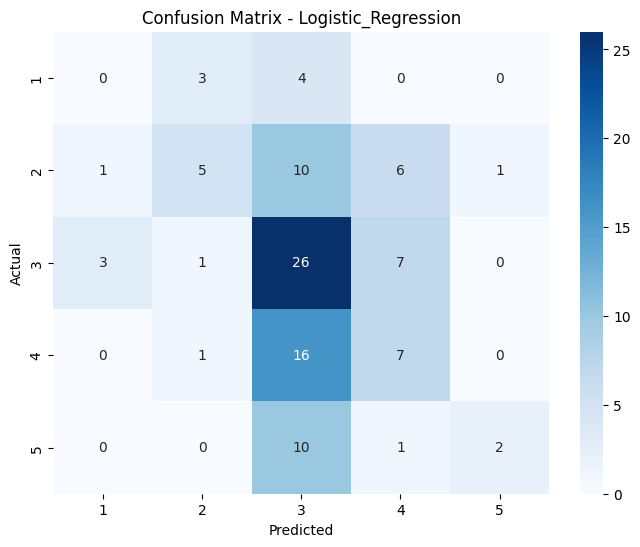


--- Decision_Tree ---
Accuracy: 0.9519
Misclassification Rate: 0.0481
Precision: 0.9509
Recall: 0.9519
F1-Score: 0.9502
Mean Absolute Error (MAE): 0.1154
Weighted Kappa: 0.8774

Confusion Matrix:


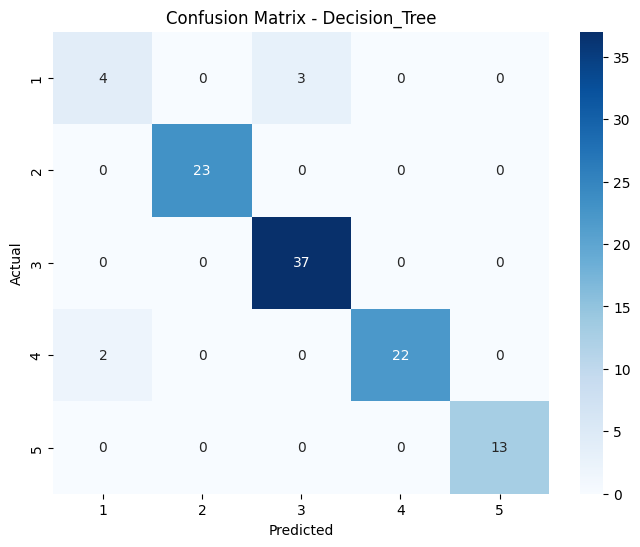


--- Random_Forest ---
Accuracy: 0.9519
Misclassification Rate: 0.0481
Precision: 0.9509
Recall: 0.9519
F1-Score: 0.9502
Mean Absolute Error (MAE): 0.1154
Weighted Kappa: 0.8774

Confusion Matrix:


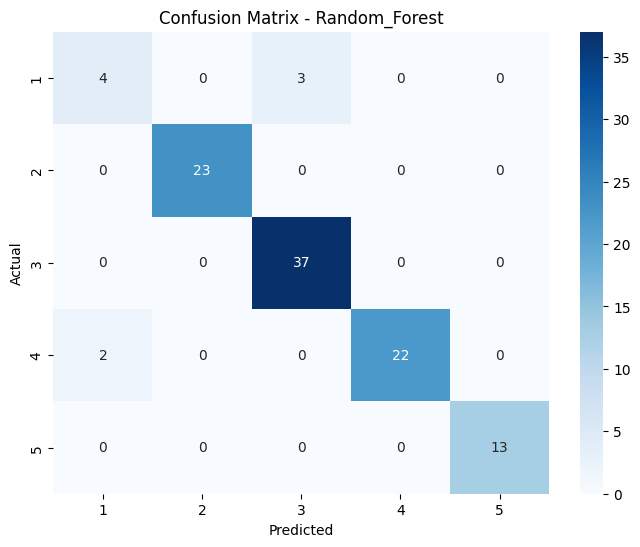

In [26]:
from sklearn.metrics import mean_absolute_error, cohen_kappa_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and display MAE, Weighted Kappa, Confusion Matrix, and other metrics for each model
print("\n--- 📊 Detailed Model Evaluation Metrics ---")

for name, results in model_results.items():
    if name != 'scaler': # Exclude the scaler
        print(f"\n--- {name} ---")

        y_test = results['storey_test']
        y_pred = results['storey_pred']

        # Calculate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Calculate Misclassification Rate
        misclassification_rate = 1 - accuracy
        print(f"Misclassification Rate: {misclassification_rate:.4f}")

        # Calculate Precision (using 'weighted' average for multi-class)
        # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
        # High precision relates to a low false positive rate.
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"Precision: {precision:.4f}")

        # Calculate Recall (using 'weighted' average for multi-class)
        # Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
        # High recall relates to a low false negative rate.
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"Recall: {recall:.4f}")

        # Calculate F1-Score (using 'weighted' average for multi-class)
        # The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"F1-Score: {f1:.4f}")


        # Calculate MAE (Treating as Ordinal)
        # MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
        # Lower MAE indicates better performance.
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Calculate Weighted Kappa
        # Weighted Kappa measures the agreement between two ratings, accounting for the possibility of the agreement occurring by chance.
        # A higher value indicates better agreement. The 'quadratic' weight penalizes larger disagreements more heavily.
        weighted_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
        print(f"Weighted Kappa: {weighted_kappa:.4f}")

        # Calculate Confusion Matrix
        # A Confusion Matrix is a table used to evaluate the performance of a classification model.
        # Each row represents the instances in an actual class, while each column represents the instances in a predicted class.
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")

        # Visualize Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=sorted(y_test.unique()),
                    yticklabels=sorted(y_test.unique()))
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

/tmp/ipython-input-2530222148.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')


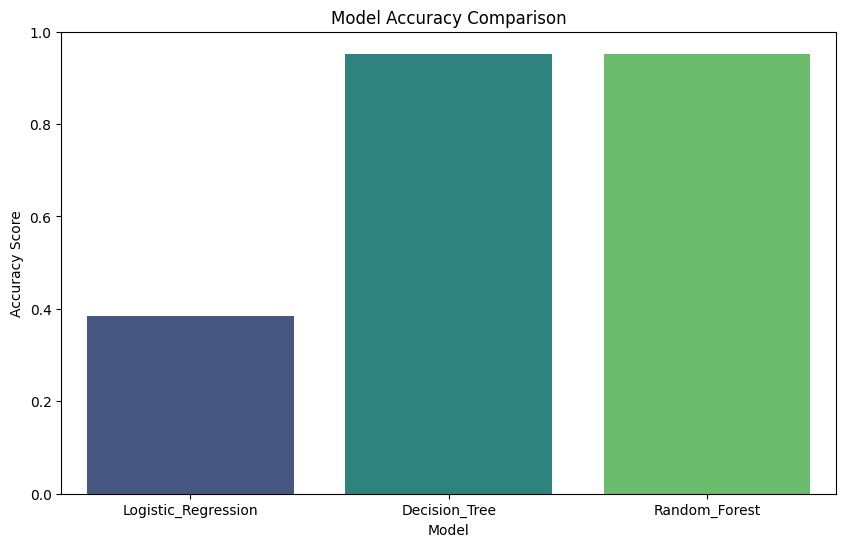

/tmp/ipython-input-2530222148.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-score (Weighted)', data=metrics_df, palette='viridis')


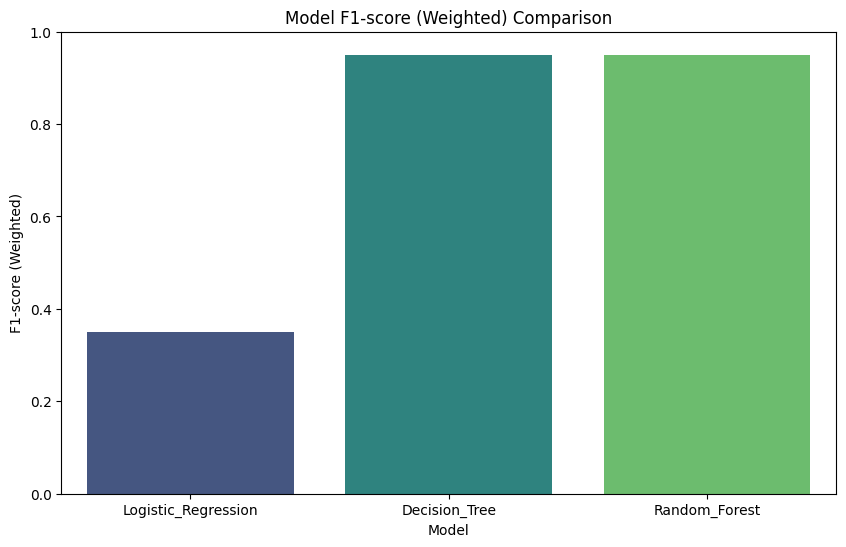

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting
model_names = list(model_results.keys())
model_names.remove('scaler') # Exclude scaler

accuracy_scores = [model_results[name]['test_accuracy'] for name in model_names]
f1_scores = [f1_score(model_results[name]['storey_test'], model_results[name]['storey_pred'], average='weighted', zero_division=0) for name in model_names]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1-score (Weighted)': f1_scores
})

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score (Weighted)', data=metrics_df, palette='viridis')
plt.title('Model F1-score (Weighted) Comparison')
plt.ylabel('F1-score (Weighted)')
plt.ylim(0, 1)
plt.show()


--- 📊 Random Forest Feature Importance ---


,Feature,Importance
4,Stress_Levels,0.222050
3,Extracurricular,0.207186
1,Academic_Performance,0.205527
0,Headaches,0.194292
2,Study_Load,0.170945


/tmp/ipython-input-2835224139.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


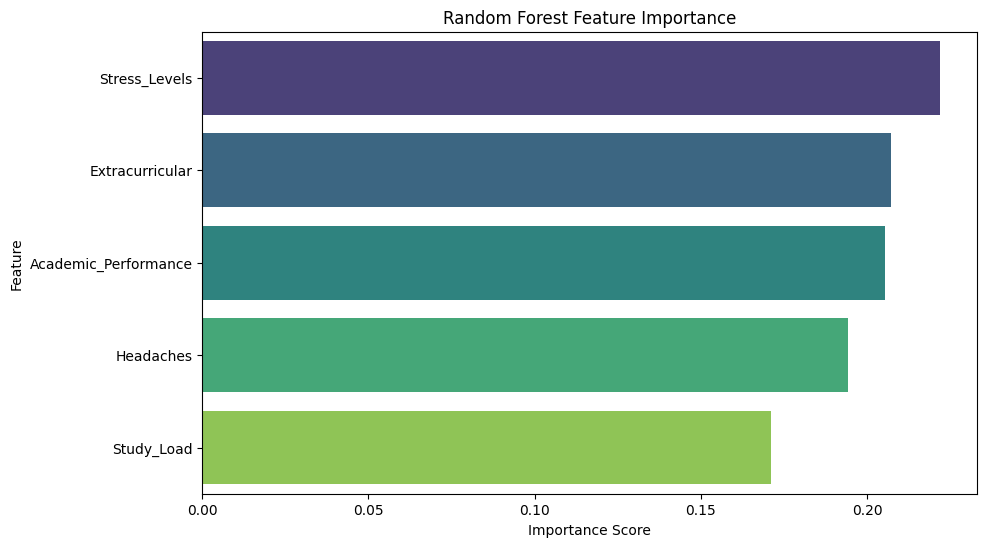

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Perform Feature Importance Analysis for Random Forest
if 'Random_Forest' in model_results and 'model' in model_results['Random_Forest']:
    rf_model = model_results['Random_Forest']['model']
    feature_names = model_results['Random_Forest']['storeX'].columns
    importances = rf_model.feature_importances_

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\n--- 📊 Random Forest Feature Importance ---")
    display(feature_importance_df)

    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

else:
    print("Random Forest model not found in model_results. Please ensure the models are trained.")

# Compare Performance: วิเคราะห์ข้อดี – ข้อเสียและสรุป

**1. Logistic Regression**
*   **ข้อดี:** เข้าใจง่าย, ประมวลผลเร็ว
*   **ข้อเสีย:** ประสิทธิภาพต่ำสุด, ไม่จับความสัมพันธ์ซับซ้อน

**2. Decision Tree**
*   **ข้อดี:** เข้าใจง่าย, แม่นยำสูง, ไม่ต้อง Scaling
*   **ข้อเสีย:** มีแนวโน้ม Overfitting, ไม่เสถียรเท่าที่ควร

**3. Random Forest**
*   **ข้อดี:** แม่นยำสูงสุด, Overfitting น้อยกว่า Decision Tree, จัดการความสัมพันธ์ซับซ้อนได้ดี
*   **ข้อเสีย:** ตีความยาก (Black Box), ใช้เวลาประมวลผลนานกว่า Logistic Regression

**สรุป Insight: เลือกใช้โมเดลไหนต่อ**
จากผลการประเมิน โมเดล **Random Forest** และ **Decision Tree** มีประสิทธิภาพสูงกว่า **Logistic Regression** อย่างชัดเจน โดย **Random Forest** ให้ความแม่นยำสูงสุดและทนทานต่อ Overfitting ได้ดีกว่า จึงเป็นโมเดลที่เหมาะสมที่สุดสำหรับปัญหาการทำนายคุณภาพการนอนนี้

# Summary: ความสัมพันธ์ระหว่างคุณภาพการนอนและความเครียด

จากการวิเคราะห์ข้อมูลและผลลัพธ์โมเดล Random Forest ที่แม่นยำที่สุด สรุปความสัมพันธ์ระหว่างคุณภาพการนอน (Sleep Quality) และความเครียด (Stress Levels) ได้ดังนี้:

1.  **ความเครียดมีผลสำคัญต่อคุณภาพการนอน:** `Stress_Levels` เป็นปัจจัยหลักในการทำนายคุณภาพการนอน

2.  **คุณภาพการนอนและความเครียดสัมพันธ์แบบผกผัน:**
    *   นอนหลับดี → ความเครียดมีแนวโน้มลดลง
    *   นอนหลับไม่ดี → ความเครียดมีแนวโน้มสูงขึ้น

3.  **ปัจจัยอื่นก็มีผล:** นอกจากความเครียด ปัจจัยอื่น (Academic Performance, Extracurricular, Headaches, Study Load) ก็ส่งผลต่อคุณภาพการนอนเช่นกัน

**สรุปโดยรวม:** คุณภาพการนอนมีความสัมพันธ์อย่างมากกับระดับความเครียด โดยการนอนที่ดีขึ้นสัมพันธ์กับความเครียดที่ลดลง และการนอนที่แย่ลงสัมพันธ์กับความเครียดที่สูงขึ้น ซึ่งเป็นผลรวมจากหลายปัจจัย